[link text](https://)## Objective : Classify Images in 3 categories


In [ ]:
#Checking the bsic information of GPU
!nvidia-smi

Sat Mar  1 07:16:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Step 1: Import Dependencies

In [37]:
!pip install -q tensorflow
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
#Import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
import tensorflow as tf
print(tf.__version__)
SEED= 42  # set random seed
warnings.filterwarnings("ignore")

2.18.0


### Step 2: Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Deep Learning Project/4.Image Classification Using CNN')

In [ ]:
# #Extract dataset.rar file (Run only first time)
# !pip install patool
# import patoolib
# patoolib.extract_archive("dataset (1).rar")
# patoolib.extract_archive("test_examples.rar")

In [ ]:
!dir

dataset		  Multi_Class_Image_Classification_Using_CNN.ipynb  test_examples.rar
dataset\ (1).rar  test_examples


### Step 3: Build CNN Model


In [ ]:
#create the CNN model
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):

        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h,h,channel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CON => RELU => POOL layers
        model.add(Conv2D(50,(5,5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size =(2,2) , strides =(2,2)))

        # second set of CON => RELU => POOL layers
        model.add(Conv2D(150,(5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides =(2,2)))

        # third set of CONV => RELU =>POOL Layer
        model.add(Conv2D(200,(5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides =(2,2)))

        #--------------------ANN------------------------
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(2000))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

### Step 4: Dataset Read

In [ ]:
print("[INFO] loading images...")
data =[]  #x
labels =[]  #y

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images("dataset")))
random.seed(42)
random.shuffle(imagePaths)

# Progress Bar
with tqdm(total=len(imagePaths)) as pbar:
    # Loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # Load the image, Pre-process it and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28,28))
        image = img_to_array(image)
        data.append(image)

        #extract the class label from the image path and update the label list
        label = imagePath.split(os.path.sep)[-2]

        if label =="Buildings":
            label = 0
        elif label =="Forest":
            label = 1
        elif label =="Sea":
            label = 2
        labels.append(label)
        # Update the progressbar
        pbar.update(1)



[INFO] loading images...


  0%|          | 0/1326 [00:00<?, ?it/s]

### Step 5: Data Splitting

In [ ]:
# Perform data normalization
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)


In [ ]:
# Check the shape of single image
data[0].shape

(28, 28, 3)

In [ ]:
data[0]

In [ ]:
# Split the data into train and test
(trainX, testX, trainY, testY) = train_test_split(data,
                                                  labels,
                                                  test_size=0.25, random_state=42)


In [ ]:
# Verify Shapes
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(994, 28, 28, 3)
(332, 28, 28, 3)
(994,)
(332,)


In [ ]:
trainY[0]  #1

0

In [ ]:
# Perform one hot label encoding
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [ ]:
trainY[0]

array([1., 0., 0.])

### Step 6: Data Preprocessing(Augumentation)

In [ ]:
# Construct the image generator for the data augmentation
aug= ImageDataGenerator(rotation_range=30,
                        width_shift_range = 0.1,
                        height_shift_range = 0.1,
                        shear_range =0.2,
                        zoom_range = 0.2,
                        horizontal_flip = True,
                        fill_mode ="nearest")

### Step 7: Compile and Training

In [ ]:
INIT_LR = 1e-3    #initializing the
BS = 64       #Batches created

#initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3 )
opt = Adam(learning_rate=INIT_LR)

model.compile(loss ="categorical_crossentropy",
              optimizer = opt,
              metrics =["accuracy"])
print("[INFO] model compiled...")

[INFO] compiling model...
[INFO] model compiled...


In [ ]:
print(model.summary)

<bound method Model.summary of <Sequential name=sequential_1, built=True>>


In [ ]:
#train the network

EPOCH = 100
print("[INFO] training network...")
H = model.fit(x= aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // BS,
              epochs=EPOCH,
              verbose=1)

# Save the model and label binarizer to disk
print("[INFO] serializing network...")
model.save("cnn_model_{}.h5".format(EPOCH))

[INFO] training network...
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - accuracy: 0.3354 - loss: 1.1690 - val_accuracy: 0.6596 - val_loss: 0.8680
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4688 - loss: 1.0169 - val_accuracy: 0.6867 - val_loss: 0.8313
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.6048 - loss: 0.8887 - val_accuracy: 0.7199 - val_loss: 0.7401
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6094 - loss: 0.8169 - val_accuracy: 0.7199 - val_loss: 0.7401
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6608 - loss: 0.7789 - val_accuracy: 0.7560 - val_loss: 0.5666
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.6890 - val_accuracy: 0.7952 - val_loss: 0.5187
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7083 - loss: 0.6895 - val_accuracy: 0.6747 - val_loss: 0.6685
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7188 - loss: 

[INFO] serializing network...


### Step 8: Model Evaluation

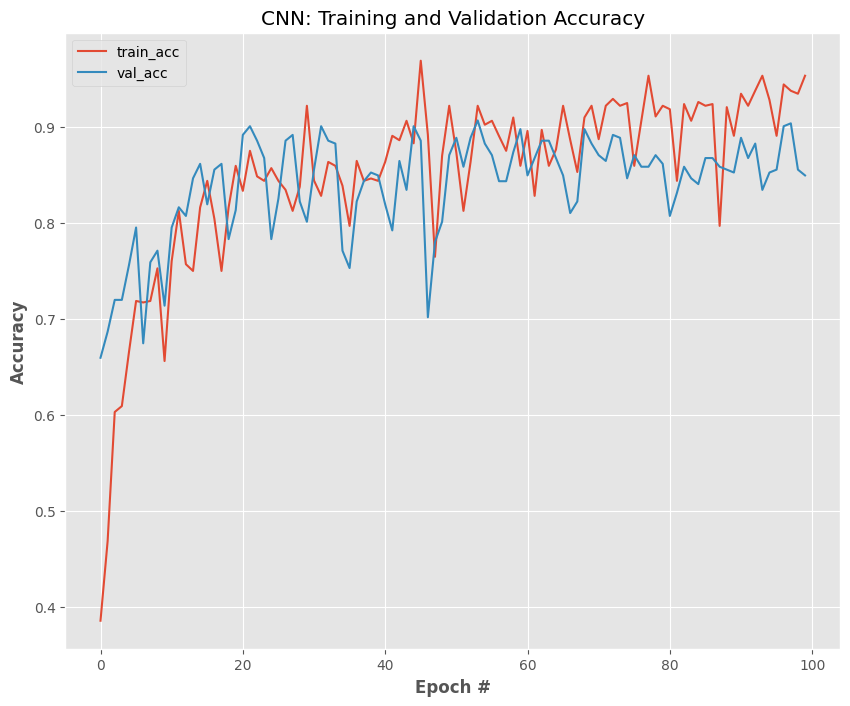

In [ ]:
# plot the training and validation accuracy  https://justpaste.it/ed3e5
N = np.arange(0, EPOCH )
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

from the above graph we can see that the validation accuracy and training accuracy are having the difference in the beginig of 0.1 (0.7 to 0.8 as graph going ) and in the end of the graph also there is a huge gap in the both the accuracy that's why we need to tune the data more

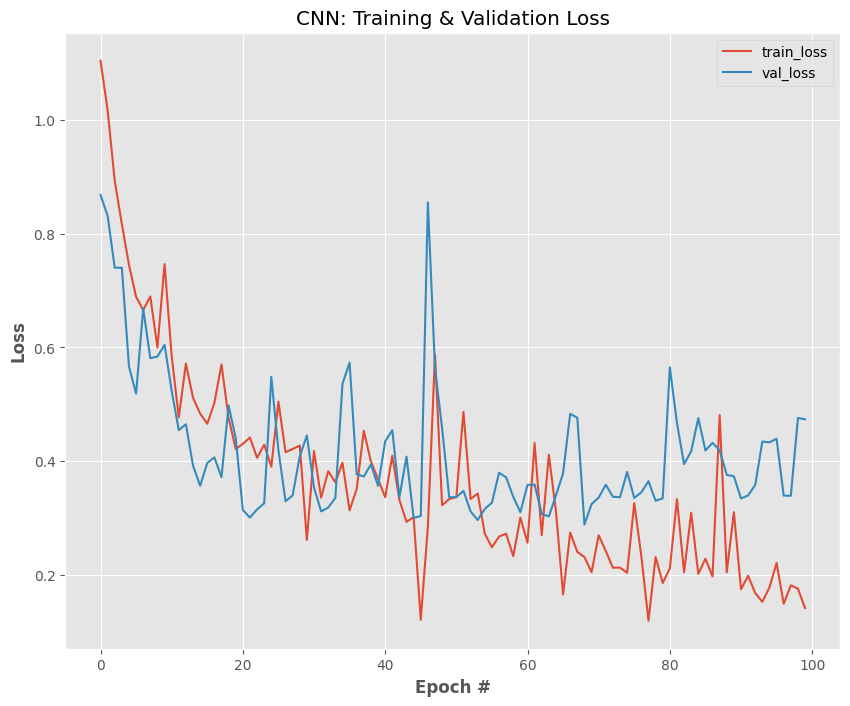

In [ ]:
# plot the training and validation loss
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

in the above graph we can see the graph of the

In [33]:
# argmax will provide the index location of the maximum values

### Step 9: Prediction On Unseen Data

In [34]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

import imutils

In [35]:
# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test_examples')))   # data folder with 2 categorical folders

all_class = ["Buildings", "Forest", "Sea"]


# progress bar
with tqdm(total=len(testImagePaths)) as pbar:

    for imagePath in testImagePaths:

        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf= model.predict(image)[0] # [[0.1 , 0.8 , 0.1]]
        print(prd_conf)

        # build the label
        label = all_class[np.argmax(prd_conf)] #[b f s]-> f
        proba = prd_conf[np.argmax(prd_conf)] # [0.1 , 0.8 , 0.1]  -> 0.8

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)

        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)

Output hidden; open in https://colab.research.google.com to view.

### STep 10: Deploymen ton Gradio

In [38]:
import gradio as gr
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from imutils import paths
%matplotlib inline

In [39]:
# # load the model
print("[INFO] loading network and...")
model = load_model("cnn_model_{}.h5".format(100))

[INFO] loading network and...


In [41]:
def predict_image(image):
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    preds = model.predict(image)[0]
    result = dict()
    result["Buildings"] = round(float(list(preds)[0]), 3)
    result["Forest"] = round(float(list(preds)[1]), 3)
    result["Sea"] = round(float(list(preds)[2]), 3)

    print(result)

In [ ]:
im = gr.Image()
label = gr.Label(num_top_classes=3)
gr.Interface(fn=predict_image,
             inputs=im,
             outputs=label,
             title="CNN Demo").launch(share=True, debug=True)
return result

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b647dfc48694432cfb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
{'Buildings': 0.061, 'Forest': 0.718, 'Sea': 0.221}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
{'Buildings': 0.061, 'Forest': 0.718, 'Sea': 0.221}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
{'Buildings': 0.061, 'Forest': 0.718, 'Sea': 0.221}
